In [ ]:
from google.colab import files

import tensorflow as tf

from keras import *
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [ ]:
uploaded = files.upload()

Saving Hand_Recognition.h5 to Hand_Recognition.h5


In [ ]:
uploaded_tflite = files.upload()

Saving HiddenLayer1QuantizedWeights.npy to HiddenLayer1QuantizedWeights.npy
Saving HiddenLayer2QuantizedWeights.npy to HiddenLayer2QuantizedWeights.npy


In [ ]:
model = models.load_model('Hand_Recognition.h5')
weights, biases = model.layers[0].get_weights()
weights_array = (weights.flatten())
biases_array = (biases.flatten())

In [ ]:
data_tflite_HiddenLayer1 = np.load('HiddenLayer1QuantizedWeights.npy')
data_quantized_HiddenLayer1  = np.round(data_tflite_HiddenLayer1 /0.0010937378974631429) #Hacemos la cuantizacion con el q que nos da Netron
weights_quantized_array_HiddenLayer1  = data_tflite_HiddenLayer1 .flatten()

In [ ]:
data_tflite_HiddenLayer2 = np.load('HiddenLayer2QuantizedWeights.npy')
data_quantized_HiddenLayer2  = np.round(data_tflite_HiddenLayer2 /0.0010937378974631429)
weights_quantized_array_HiddenLayer2  = data_tflite_HiddenLayer2 .flatten()

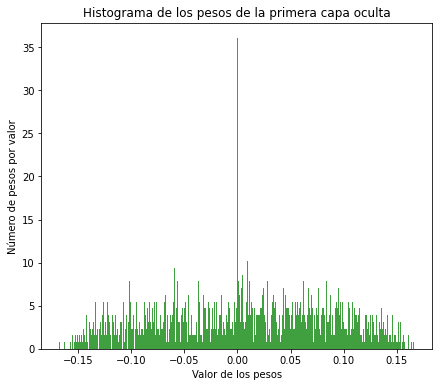

In [ ]:
plt.figure(figsize=(7,6))
n, bins, patches = plt.hist(weights_array, bins = 1100, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Valor de los pesos')
plt.ylabel('Número de pesos por valor')
plt.title('Histograma de los pesos de la primera capa oculta')
plt.show()

In [ ]:
for i in range(len(n)):
  if (n[i] > 15):
    print(i)

552


In [ ]:
bins

array([-0.16771883, -0.16741505, -0.16711126, ...,  0.165831  ,
        0.16613479,  0.16643856], dtype=float32)

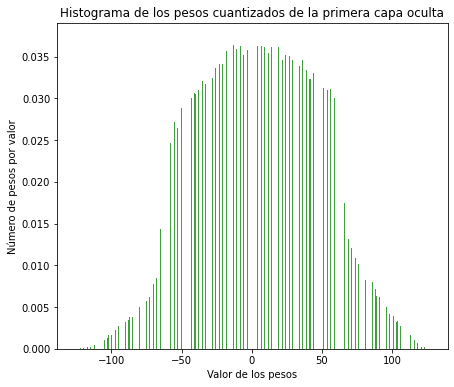

In [ ]:
plt.figure(figsize=(7,6))
nQ, binsQ, patchesQ = plt.hist(weights_quantized_array_HiddenLayer2, bins = 1200, density=True, facecolor='g', alpha=0.75)
plt.xlabel('Valor de los pesos')
plt.ylabel('Número de pesos por valor')
plt.title('Histograma de los pesos cuantizados de la primera capa oculta')
plt.show()

In [ ]:
count = 0

for i in range(len(nQ)):
  if (nQ[i] != 0):
    count = count + 1

print(count)


254


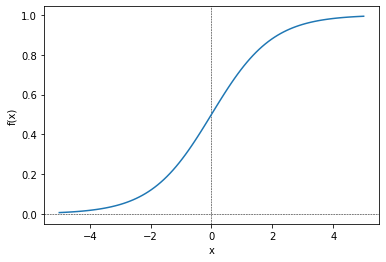

In [ ]:
#FUNCIONES DE ACT
sigm = (lambda x : 1 / (1 + np.exp(-x)) ,  
        lambda x : x*(1-x))

relu = lambda x: np.maximum(0,x)

tanh = lambda x: ((np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x)))

_x = np.linspace(-5, 5 , 100) 

plt.figure(figsize=(6,4))
#plt.title('Tangente hiperbólica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(color='k', lw=0.5, ls='--')
plt.axvline(color='k', lw=0.5, ls='--')
plt.grid(False)
plt.plot(_x, sigm[0](_x))
#plt.plot(_x, relu(_x))
#plt.plot(_x, tanh(_x))